In [1]:
import sys
sys.path.append("./../..")

In [62]:
from collections import namedtuple
%matplotlib inline
import numpy as np
from numpy.lib.recfunctions import append_fields
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.utils import as_float_array
from yellowbrick.cluster.base import ClusteringScoreVisualizer
from yellowbrick.exceptions import YellowbrickValueError
from yellowbrick.style import resolve_colors, color_palette

from yellowbrick.utils import is_dataframe, is_structured_array, has_ndarray_int_columns

In [3]:
%reload_ext yellowbrick
# from yellowbrick.cluster.iterlabels import *
from yellowbrick.cluster.base import ClusteringScoreVisualizer
from yellowbrick.features import ScatterVisualizer

In [73]:
class IterLabelsVisualizer(ClusteringScoreVisualizer):
    """
    TODO: Document this class!
    """

    def __init__(self, model, ax=None, group_label=None, **kwargs):
        super(IterLabelsVisualizer, self).__init__(model, ax=ax, **kwargs)

        # Visual Properties
        # TODO: Fix the color handling
        self.colormap = kwargs.get('colormap', 'set1')
        self.color = kwargs.get('color', None)
        self.group_label_ = group_label if group_label else 'group_label'

        # Required internal properties
        self.X = None
        self.y = None
        self.label_slices = None
        self.labels_ = None

    def get_label_slices(self, label_array, **kargs):
        """
        """
        # Grap the label class  column and sort it
        # Determine the what label class ids and numberic ids should be attached
        label_ids = np.unique(label_array)
        time_labels = np.arange(label_ids.size)

        # create an index to hold where labels should be applied and then apply them
        label_map = {label: position+1 for position, label in enumerate(label_ids)}
        array_labeled = [label_map[val] for val in label_array]

        # Measure the time slices for each
        self.label_slices = ndimage.find_objects(array_labeled)

        return self.label_slices

    def transform(self, X, y=None, label_col=None, label_value=None, label_array=None, **kargs):

        if label_col is None:
            raise Exception("The tranform method requires a label_col")


        if label_array is not None:
            # if the label array is present then skip the other steps
            pass

        elif isinstance(X, np.ndarray) and isinstance(label_col, int):
            label_array = X[:, label_col]

        elif is_dataframe(X):
            label_array = X[label_col].values
            X = X.as_matrix()

        # handle numpy named/ structured array
        elif is_structured_array(X):
            label_array = X[label_col]

        else:
            raise Exception("X is not a recognized data type")

        if label_value is not None:
            if label_value not in np.unique(label_array):
                raise Exception("label_value not found in the label_col")

            label_indices = np.where(label_array==label_value)
            self.X = X[label_indices]
            if y:
                self.y = y[label_indices]

        else:
            label_indices = np.argsort(label_array)
            self.X = X[label_indices]
            if y:
                self.y = y[label_indices]
            self.get_label_slices(np.sort(label_array))


    def fit(self, label_col=None, label_value=None, label_array=None, **kargs):
        
        # find the singular 
        if self.label_slices is None:
            self.fit_model(X_slice)
        
        pass
            
            

In [74]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans

In [75]:
X, y = make_blobs(
    n_samples=10000, n_features=2, centers=6, shuffle=True, random_state=0
)

In [76]:
df = pd.DataFrame(X, columns=['one', 'two'])
df['three'] = y
df.head(3)
df_matrix = df.to_records()

In [77]:
df_matrix['one']

array([ 0.00818796,  1.98843837, -0.79226837, ..., -0.06612192,
       -0.21932935,  3.43147023])

In [78]:
label_column = X_[:,2]

In [79]:
label_column=   np.where(label_column==2)

In [80]:
label_column

len(X[label_column])

1667

In [101]:
visualizer = IterLabelsVisualizer(KMeans(n_clusters=6))
visualizer.transform(df_matrix, label_col='three', label_value=4)

In [96]:
len(visualizer.X)

1666

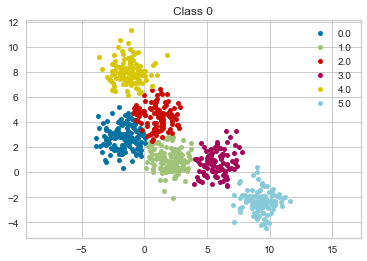

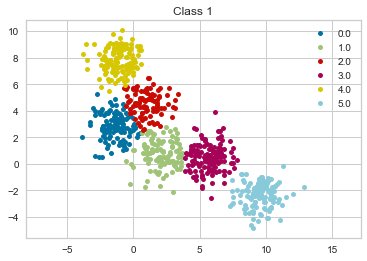

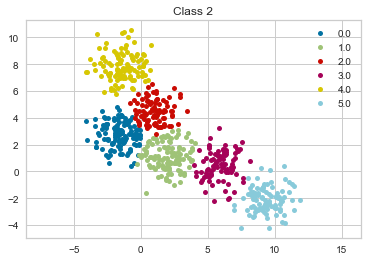

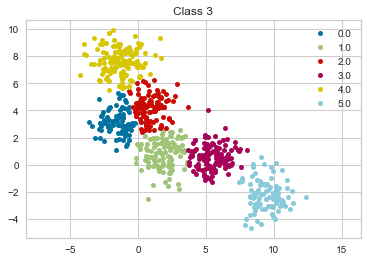

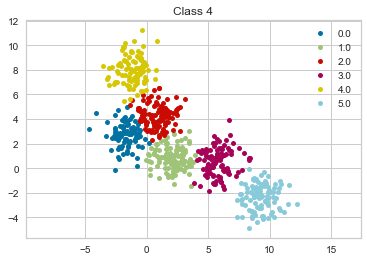

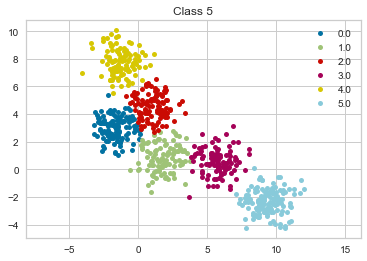

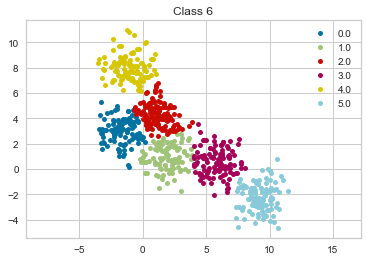

In [233]:
labels_unique = np.unique(visualizer.labels_)

for slice_name, time_slice in enumerate([visualizer.time_slices[n] for n in [0,1,2,4,5,6,7]]):
    slice_name = str(slice_name)
    x_slice = visualizer.X[time_slice]
    labels_slice = visualizer.labels_[time_slice]

    fig, ax = plt.subplots()
    
    for label in labels_unique:
        points_indices = np.where(label==labels_slice)
        point_values = x_slice[points_indices]
        ax.plot(point_values[:,0], point_values[:,1], marker='o', linestyle='', ms=5, label=label)
 
    ax.set_aspect('equal', 'datalim')
    ax.legend()
    plt.grid(True)
    plt.title("Class {label}".format(label=slice_name[0]))
    plt.show()
